# Further development of the parts started in the previous notebook.

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns
import plotly.express as px

import numpy as np
import pandas as pd
import polars

import statsmodels.formula.api as smf
import torch

## 1. Improved dual evaluation 

This is a key direction for everything that follows: we need to be able to convert moments to parameters, and to evaluate the dual rate function.

In [2]:
from icnn import CGF_ICNN
from models.trainers import trainModel

%run icnn.py

In [3]:
data = torch.randn(1000, 2)

CGF = CGF_ICNN(data)
ckpt = trainModel(CGF, log_wandb=False, directory='trainedParameters/test0',
                 )
model = CGF_ICNN.load_from_checkpoint(ckpt, data_to_model=data)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name           | Type       | Params | Mode 
------------------------------------------------------
0 | initialLayer   | Linear     | 30     | train
1 | internalLayers | ModuleList | 66     | train
2 | shortcutLayers | ModuleList | 21     | train
3 | nlin           | CELU       | 0      | train
4 | lossFn         | MSELoss    | 0

Sanity Checking: |                                          | 0/? [00:00<?, ?it/s]

Training: |                                                 | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                               | 0/? [00:00<?, ?it/s]

In [4]:
model = CGF_ICNN.load_from_checkpoint(ckpt, data_to_model=data)

### Simple but easy approach: gradient descent

In [5]:
from torch.autograd import grad
from torch.optim import Adam

def inv_jac(model, p, optimizer=Adam):
    """ find the inputs that produces the desired jacobian
    
        Jointly minimizes all inputs by minimizing the sum.
        This can be a problem if poor convergence at one point
        impacts convergence at other points
    """

    def to_minimize(x):
        return -( torch.einsum('Nk, Nk -> N', p, x) - model.fwd_cpu(x).squeeze() )

    input_val = torch.nn.Parameter(torch.zeros(p.shape))
    optimizer = Adam((input_val,), lr=1)
    
    for step in range(200):
        curr_val = optimizer.param_groups[0]['params'][0]
        optimizer.zero_grad()
        
        out = to_minimize(curr_val).sum()
        out.backward()
        optimizer.step()

    x_val = optimizer.param_groups[0]['params'][0].data
    
    return x_val, -to_minimize(x_val)


In [6]:
p = torch.randn(10, 2)

outs, values = inv_jac(model, p)


In [7]:
model.jac(outs)

tensor([[ 7.5156e-01, -1.2129e-01],
        [-2.7208e+00, -1.5501e+00],
        [-8.6976e-02,  3.6134e-01],
        [ 6.2868e-01,  6.1984e-01],
        [ 6.6868e-01,  1.5431e+00],
        [-1.3205e-01, -1.1374e-02],
        [-3.0881e-03, -3.8646e-01],
        [ 3.9557e-04, -9.0857e-01],
        [-1.0610e+00,  1.2025e-01],
        [-2.6698e+00, -9.2759e-01]], grad_fn=<SliceBackward0>)

In [8]:
p

tensor([[ 7.5153e-01, -1.2118e-01],
        [-2.8859e+00, -1.5711e+00],
        [-8.6969e-02,  3.6130e-01],
        [ 6.2867e-01,  6.1988e-01],
        [ 6.6867e-01,  1.5431e+00],
        [-1.3206e-01, -1.1407e-02],
        [-3.0889e-03, -3.8644e-01],
        [ 3.9789e-04, -9.0858e-01],
        [-1.0610e+00,  1.2019e-01],
        [-2.6698e+00, -9.2754e-01]])

In [9]:
values

tensor([ 0.5704, 20.8339,  0.3348,  0.9369,  1.8416,  0.0854, -0.0643,  0.1192,
         0.7064,  4.6379], grad_fn=<NegBackward0>)

Looks good for now. Note that, as I allude to in the doc string, there may be issues with this type of solution: the empirical CGF won't generally reach all slopes, so extreme slopes are likely un-attainable.

For the time being, I think that this is sufficient.

### Dual plots

In [75]:
t1 = torch.linspace(-4, 4, 70)
t2 = torch.linspace(-4, 4, 70)

T1, T2 = torch.meshgrid(t1,t2)

In [76]:
all_inputs = torch.stack([T1, T2])
all_inputs = all_inputs.permute((1,2,0)).reshape(-1, 2)

In [77]:
xs = model.inv_jac(all_inputs)

Text(0.5, 1.0, 'Inverse Jacobian: Forward Error')

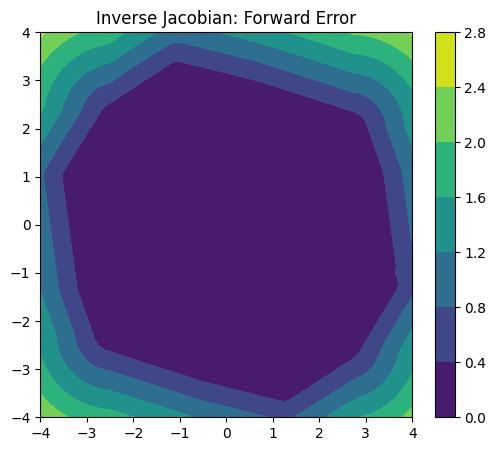

In [78]:
error = (((model.jac(xs) - all_inputs)**2).sum(1)**0.5).reshape(70, 70)

plt.contourf(T1, T2, error.detach())
plt.colorbar()
plt.title('Inverse Jacobian: Forward Error')

This plot shows the reasonable domain of the dual function: everything in purple.

Text(0.5, 1.0, 'Dual function')

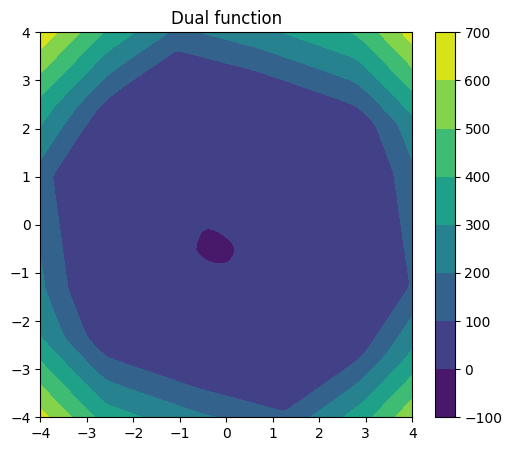

In [105]:
figsize(6,5)
plt.contourf(T1, T2, model.dual_function(all_inputs).reshape(70,70).detach())
plt.colorbar()
plt.title('Dual function')

Text(0.5, 1.0, 'Dual function, restricted domain')

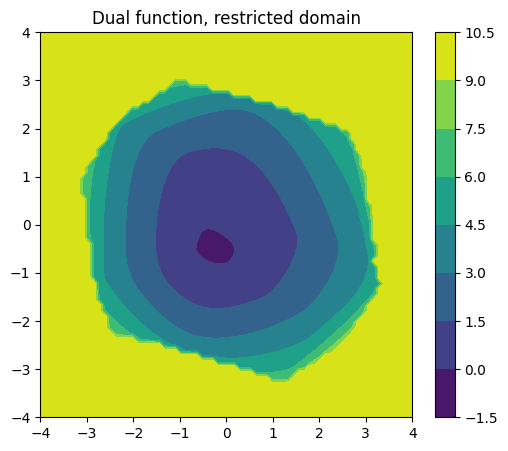

In [117]:
dual_value = model.dual_function(all_inputs).reshape(70,70)
dual_value[ error > 1E-2 ] = 10.

plt.contourf(T1, T2, dual_value.detach())
plt.colorbar()

plt.title('Dual function, restricted domain')

This the view that we have of the dual function.

### Investigating locations with the same gradient 

In [146]:
p = torch.randn(1,2)
print(p)
print( model.inv_jac(p) )
print( model.jac( model.inv_jac(p)))

tensor([[-2.1425, -0.6942]])
tensor([[-2.4330, -0.3493]])
tensor([[-2.1426, -0.6942]], grad_fn=<SliceBackward0>)


In [174]:
x = torch.randn(3,2)
print(x)
print( model.jac(x) )
print( model.inv_jac( model.jac(x).detach()))
print( model.jac(model.inv_jac( model.jac(x).detach())) )

tensor([[-0.8984, -1.2815],
        [ 0.9335, -2.4798],
        [-0.2372,  0.3117]])
tensor([[-0.7305, -0.9922],
        [ 1.0539, -2.1642],
        [-0.3814, -0.5587]], grad_fn=<SliceBackward0>)
tensor([[-0.8984, -1.2815],
        [ 0.9336, -2.4798],
        [-0.4482, -0.4747]])
tensor([[-0.7305, -0.9922],
        [ 1.0539, -2.1642],
        [-0.3814, -0.5590]], grad_fn=<SliceBackward0>)


It's not super frequent, but the inverse jacobian occasionally finds sizably different $x$ input values with very similar Jacobian values.

In [260]:
x1 = torch.tensor([[-0.2372,  0.3117]])
x2 = torch.tensor([[-0.4482, -0.4747]])

print( model.jac(x1) )
print( model.jac(x2) )

tensor([[-0.3813, -0.5587]], grad_fn=<SliceBackward0>)
tensor([[-0.3814, -0.5590]], grad_fn=<SliceBackward0>)


In [270]:
ls = torch.linspace(0,1,20)

slopes = []
for l in ls:
    slopes.append(
        model.jac( (l*x1 + (1-l)*x2))
    )

In [271]:
slopes

[tensor([[-0.3814, -0.5590]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5590]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5590]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5590]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5590]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5589]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5589]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5589]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5589]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5589]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5589]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5588]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5588]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5588]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5588]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5588]], grad_fn=<SliceBackward0>),
 tensor([[-0.3814, -0.5588]], grad_fn=<SliceBackward0>),
 tensor([[-0.3813, -0.5587]], g

This is a region of constant slope on the primal function.

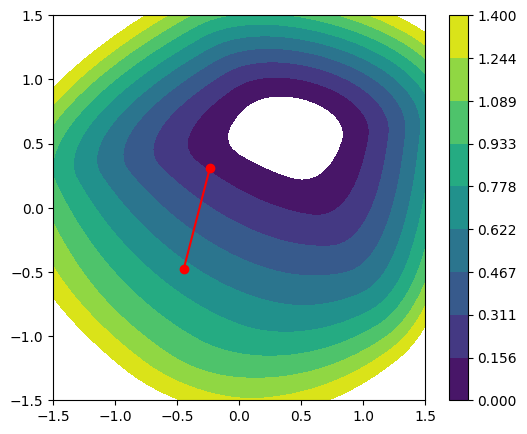

In [274]:
x1 = torch.linspace(-1.5, 1.5, 70)
x2 = torch.linspace(-1.5, 1.5, 70)

X1, X2 = torch.meshgrid(x1,x2)

all_inputs = torch.stack([X1, X2])
all_inputs = all_inputs.permute((1,2,0)).reshape(-1, 2)

outs = model.fwd_cpu(all_inputs)

points = torch.tensor([[-0.2372,  0.3117], [-0.4482, -0.4747]])

plt.contourf(X1, X2, outs.reshape(70, 70).detach(), np.linspace(0, 1.4, 10))
plt.plot(points[:, 0], points[:, 1], '-or')
plt.colorbar()

Ok, I think I can see what is happening here.
The learned CGF is piece-wise linear: it is a set of planes connected together. That's why it's possible to get the same slope at multiple points: they are all on the same plane.

Text(0.5, 1.0, 'Magnitude of Gradient, Removing the Component Aligned With Our Examples')

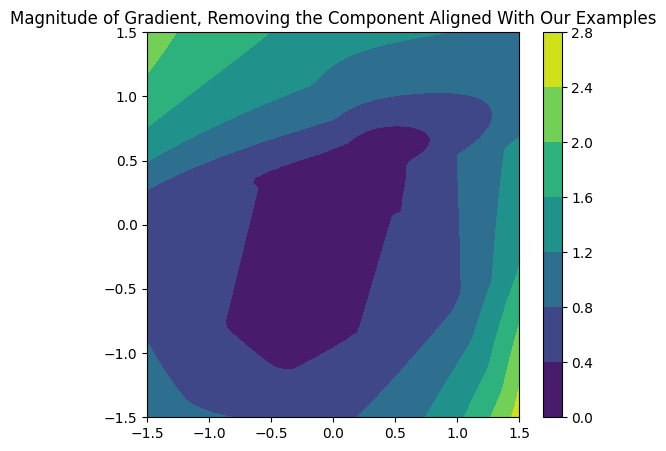

In [299]:
baseline = model.jac(points)[0]
grad_values =  model.jac(all_inputs)

similarity = torch.einsum('Nk, k -> N', grad_values, baseline).detach()

proj = grad_values - similarity[:, None] @ baseline[None, :]


plt.contourf(X1, X2, torch.norm( proj, dim=1).reshape(70, 70).detach())
plt.colorbar()
plt.title('Magnitude of Gradient, Removing the Component Aligned With Our Examples')

Hmmmm, ok. So the planes are not arranged angularly around the origin, as I thought they might be. Instead, they look more like a series of facets roughly covering the empirical CGF.

Still, this make sense. It also indicates that I need more layers and more neurons per layer. Alternatively, a larger CELU parameter or using softplus layers might help stretch the non-linear portion to cover a broad swath of space.

## 2. Improved training and network architecture.

The problems that we saw above, and some that we show here point to a need for improving the networks.

This is a longer process, see notebook 0.25

## 2. Convergence to the rate function

I now understand how the rate function comes into play in large deviations theory: it is essentially a tight Chernoff bound, evaluated at the large n limit. How does this compare to the actual CDFs?

### Finding a match

In [3]:
from scipy.stats import norm

def rate_fn(x): return x**2 / 2
    
def n_mean_pdf(x, n): return  -1/n * np.log(norm(0, (1./n)**0.5).pdf(x))
# note that the variance of the mean scales with 1/n


Text(0.5, 1.0, 'Probability density')

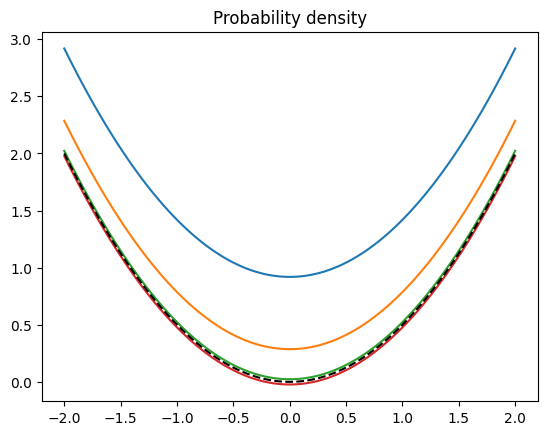

In [4]:
xs = np.linspace(-2, 2, 100)

for n in [1, 2, 5, 10]:
    plt.plot(xs, n_mean_pdf(xs, n))

plt.plot(xs, rate_fn(xs), '--k' )
plt.title('Probability density')

This example is from one of the large deviations papers: it does not take very large averages for the probability density to converge to the large deviations function.

Note that constant terms in the pdf are the cause of the offset from the rate function. That's what shrinks when the number of samples increases.

This also applies near the mean, causing the empirical version to shrink to zero.

/var/folders/_j/lst7wc811v14243bptx2xw640000gn/T/ipykernel_3950/1683092117.py:1: RuntimeWarning: divide by zero encountered in log
  def n_mean_cdf(x, n): return  -1/n * np.log( 1-norm(0, (1./n)**0.5).cdf(x))


Text(0.5, 1.0, '1 - Cumulative density')

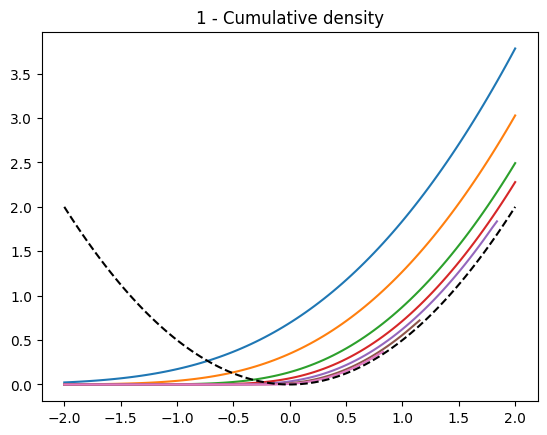

In [5]:
def n_mean_cdf(x, n): return  -1/n * np.log( 1-norm(0, (1./n)**0.5).cdf(x))

xs = np.linspace(-2, 2, 100)

for n in [1, 2, 5, 10, 20, 50, 100]:
    plt.plot(xs, n_mean_cdf(xs, n))

plt.plot(xs, rate_fn(xs), '--k' )
plt.title('1 - Cumulative density')

This one indeed takes much longer to converge, like 50 - 100 datapoints before it starts to look reasonable.

Large numbers of samples will make the tests less sensitive, but also less prone to false positives.

#### Meaning

It is clear where this comes from: the total probability above is dominated by the probability density at the lowest $x$ value. That is where the expression for the rate function comes from.

The question is: does that hold in general?

__Ans:__ Yes. This follows from convexity of the rate function, implying that points farther away from the mean have large $I$ values, which are expanded as n gets large.

#### I guess the question here is whether these differences are detected in a KS test

The thing is that the rate function gives an un-normalized pdf back, not the CDF....

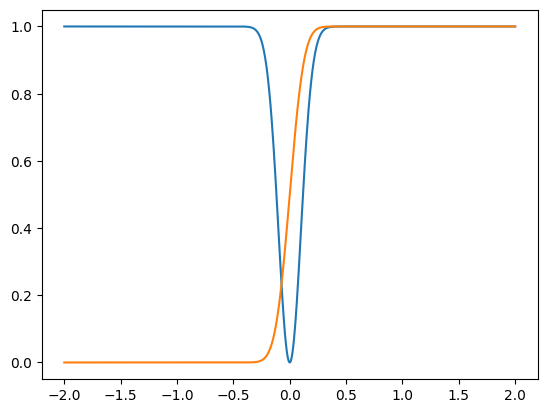

In [6]:
xs = np.linspace(-2, 2, 1000)

n = 100
plt.plot(xs, 1 - np.exp(-n*rate_fn(xs)))
plt.plot(xs, norm(0, (1./n)**0.5).cdf(xs))

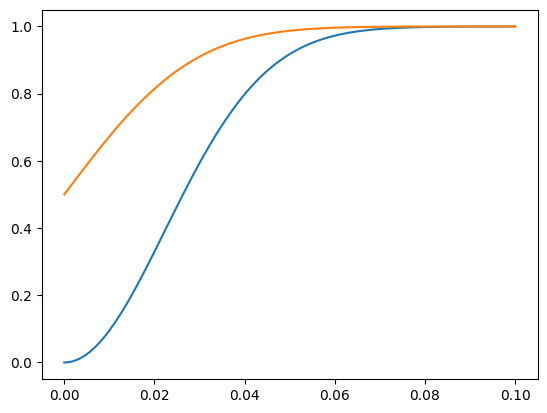

In [7]:
xs = np.linspace(0, 0.1, 1000)

n = 2000
plt.plot(xs, 1 - np.exp(-n*rate_fn(xs)))
plt.plot(xs, norm(0, (1./n)**0.5).cdf(xs))

Hmmm, hard to see how this can achieve convergence in a reasonable number of samples...

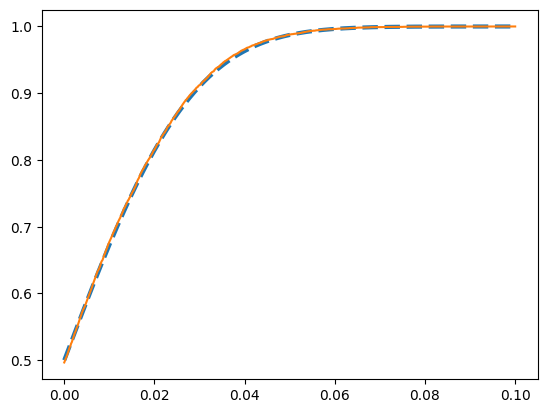

In [8]:
from scipy.stats import ecdf

plt.plot(xs, norm(0, (1./n)**0.5).cdf(xs), '--', linewidth=3)

data = np.random.randn(n, 10000).mean(0)
plt.plot(xs, ecdf(data).cdf.evaluate(xs))

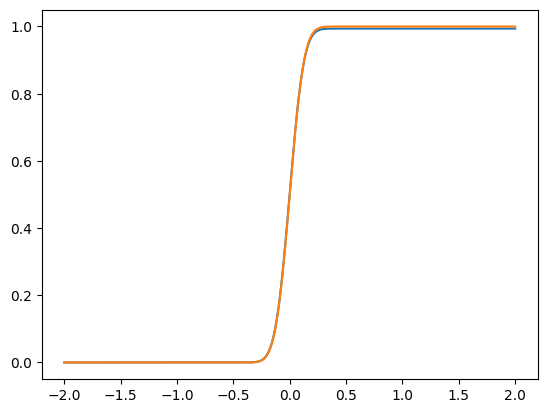

In [9]:
xs = np.linspace(-2, 2, 1000)

n = 100
plt.plot(xs, np.cumsum(np.exp(-n*rate_fn(xs)))/63)
plt.plot(xs, norm(0, (1./n)**0.5).cdf(xs))

This looks totally reasonable.

### How good is the normalized rate function as a pdf?

Text(0.5, 1.0, 'Different Variances')

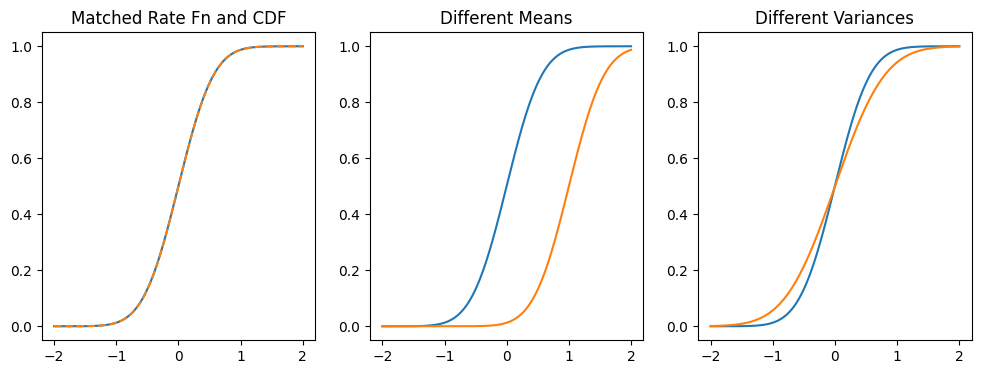

In [10]:
figsize(12, 4)
plt.subplots(1,3)

xs = np.linspace(-2, 2, 1000)

n = 5
rate = np.cumsum(np.exp(-n*rate_fn(xs)))
rate = rate / rate[-1]

plt.subplot(1,3,1)
plt.plot(xs, rate)
plt.plot(xs, norm(0, (1./n)**0.5).cdf(xs), '--')

plt.title('Matched Rate Fn and CDF')

plt.subplot(1,3,2)
plt.plot(xs, rate)
plt.plot(xs, norm(1, (1./n)**0.5).cdf(xs))

plt.title('Different Means')

plt.subplot(1,3,3)
plt.plot(xs, rate)
plt.plot(xs, norm(0, (2./n)**0.5).cdf(xs))

plt.title('Different Variances')

This looks like exactly what we want: it is similar for similar distributions, different for different ones.

The questions are:
1. Are there any reasons _not_ to treat the rate function as the CDF?
2. What is the multivariate version of Cramer's Theorem?

#### What about a Poisson distribution?

In [11]:
from scipy.stats import poisson
from scipy.optimize import minimize

rate = 1.

CGF = lambda x: rate*( np.exp(x) - 1)

def compute_rate_poisson(x):
    # legendre transform
    return -minimize(lambda theta: - x*theta + CGF(theta), 0).fun

def rate_fn_poisson(xs):
    return np.fromiter(map(compute_rate_poisson, xs), float)

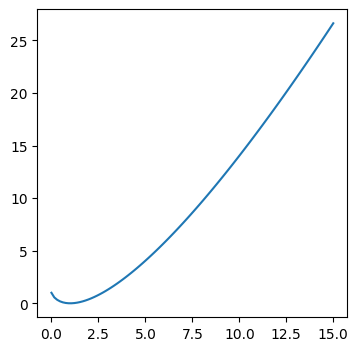

In [12]:
xs = np.linspace(0, 15, 100)

figsize(4,4)
plt.plot(xs, rate_fn_poisson(xs))

Text(0.5, 1.0, 'Not Matched')

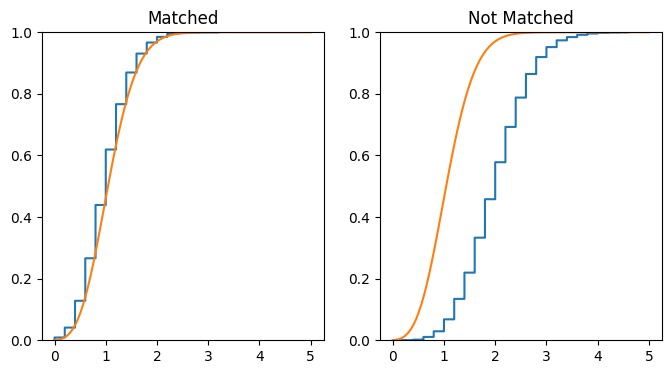

In [13]:
figsize(8, 4)
plt.subplots(1,2)

n = 5

xs = np.linspace(0, 5, 100)
LD_cdf = np.cumsum(np.exp(-n*rate_fn_poisson(xs)))

plt.subplot(1,2,1)
mean_samples = poisson(rate).rvs((10000, n)).mean(1)
plt.ecdf(mean_samples)

plt.plot(xs, LD_cdf / LD_cdf[-1])
plt.title('Matched')

plt.subplot(1,2,2)
mean_samples = poisson(rate+1).rvs((10000, n)).mean(1)
plt.ecdf(mean_samples)

plt.plot(xs, LD_cdf / LD_cdf[-1])
plt.title('Not Matched')

That one looks good too. Can we tell the difference between matched normal and poisson distributions?

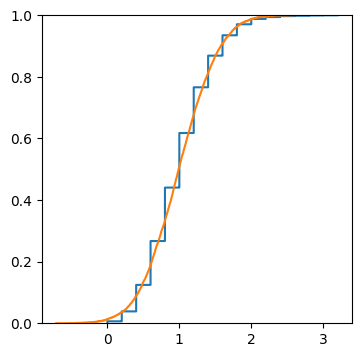

In [14]:
n = 5
poisson_samples = poisson(rate).rvs((10000, n)).mean(1)
normal_samples = norm(rate, rate).rvs((10000, n)).mean(1)

figsize(4,4)
plt.ecdf(poisson_samples)
plt.ecdf(normal_samples)

Even the empirical CDFs look pretty similar

In [15]:
from scipy.stats import kstest

kstest(poisson_samples, normal_samples)

KstestResult(statistic=np.float64(0.1087), pvalue=np.float64(7.712357268159945e-52), statistic_location=np.float64(1.0), statistic_sign=np.int8(1))

But the KS test can dsitinguish the two.

In [17]:
from scipy.integrate import quad
rate_pdf = lambda xs: np.exp(-n*compute_rate_poisson(xs))

normalization = quad(rate_pdf, 0., np.inf)[0]

def poisson_rate_cdf(xs):
    # very slow, but it works for now
    outs = np.zeros(xs.shape)
    for i, x in enumerate(xs):
        #print(x)
        previous = quad(rate_pdf, 0., x)[0]
        outs[i] = previous / normalization
    return outs

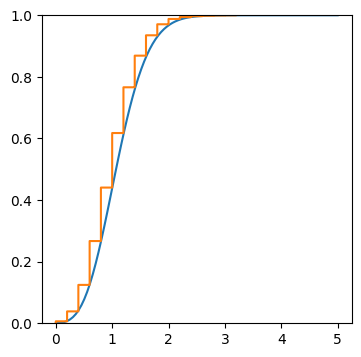

In [18]:
plt.plot(xs, poisson_rate_cdf(xs))
plt.ecdf(poisson_samples)

In [19]:
poisson_samples_small = poisson(rate).rvs((1000, 5)).mean(1)
kstest(poisson_samples_small, poisson_rate_cdf)

KstestResult(statistic=np.float64(0.19052508482985137), pvalue=np.float64(2.906661520293158e-32), statistic_location=np.float64(1.0), statistic_sign=np.int8(1))

Here we see that the KS test _does_ find significant differences between poisson random samples and the poisson rate function

In [20]:
poisson_samples_small = poisson(1).rvs(size=1000)
kstest(poisson_samples_small, poisson(1).cdf)

KstestResult(statistic=np.float64(0.36787944117144245), pvalue=np.float64(7.078187899043445e-122), statistic_location=np.int64(0), statistic_sign=np.int8(-1))

In [21]:
normal_samples_small = norm().rvs(size=1000)
kstest(normal_samples_small, norm().cdf)

KstestResult(statistic=np.float64(0.025412696716764244), pvalue=np.float64(0.5298453673443986), statistic_location=np.float64(-0.6451570852644509), statistic_sign=np.int8(-1))

Ahhh, so the KS test is failing because the distribution is _discrete_. This is actually a bad example.

#### A different random variable: gamma

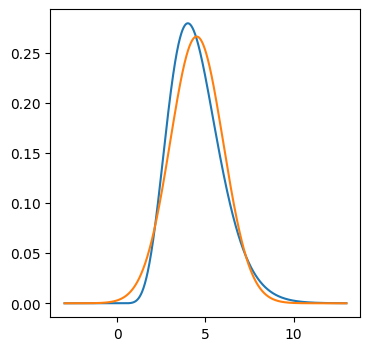

In [22]:
from scipy.stats import gamma

my_gamma = gamma(9, scale=1/2)
my_norm = norm(my_gamma.mean(), my_gamma.var()**0.5)


xs = np.linspace(-3, 13, 1000)
plt.plot(xs, my_gamma.pdf(xs))
plt.plot(xs, my_norm.pdf(xs))

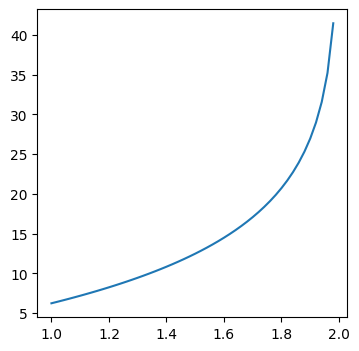

In [23]:
def gamma_CGF(t, a=9, beta=2):
    return -a * np.log( 1 - (t/beta))

ts = np.linspace(1, 2*0.99)
plt.plot(ts, gamma_CGF(ts))

Note that $t < \beta$

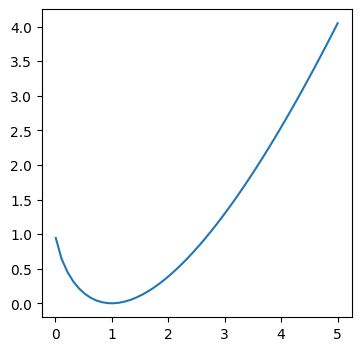

In [24]:
def rate_fn_gamma(xs):
    def find_legendre(x):
        # legendre transform
        return -minimize(lambda t: - x*t + gamma_CGF(t), 0).fun

    return np.fromiter(map(compute_rate_poisson, xs), float)

xs = np.linspace(0.01, 5)
plt.plot(xs, rate_fn_gamma(xs))

Note that $x>0$

__First test: using the CDFs__

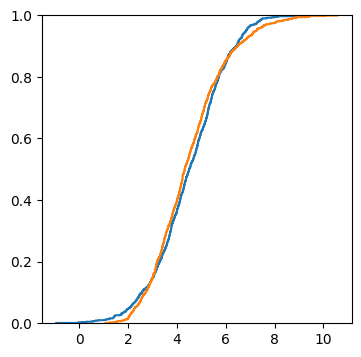

In [25]:
normal_data = my_norm.rvs(1000)
gamma_data = my_gamma.rvs(1000)

plt.ecdf(normal_data)
plt.ecdf(gamma_data)

In [26]:
# thanks chatgpt

import pandas as pd
import numpy as np

# Create a sample DataFrame
data = np.random.rand(5, 5)  # 5x5 matrix of random values between 0 and 1
df = pd.DataFrame(data, columns=[f'Col{i+1}' for i in range(5)])

# Define a function to color the cells based on their values
def color_cells(val):
    color = plt.cm.Blues(val)  # You can choose different colormap like 'viridis', 'coolwarm', etc.
    return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)})'

# Apply the color styling to the DataFrame
styled_df = df.style.map(color_cells)

# Display the styled table
styled_df

,Col1,Col2,Col3,Col4,Col5
0,0.631168,0.671399,0.066235,0.573733,0.981490
1,0.826977,0.300570,0.005250,0.522684,0.015628
2,0.581368,0.923610,0.132775,0.298239,0.303690
3,0.490024,0.662519,0.577155,0.478505,0.274461
4,0.601839,0.999469,0.262151,0.624579,0.826615


In [27]:
dists = {'norm': my_norm, 'gamma': my_gamma}

rows = []
for data_dist in dists.items():
    for test_dist in dists.items():
        p_val = kstest(data_dist[1].rvs(1000), test_dist[1].cdf).pvalue
        rows.append({'data': data_dist[0], 'test': test_dist[0], 'pval':p_val})
tests = pd.DataFrame(rows)
tests = tests.pivot(columns='data', index='test', values='pval')

tests.style.map(color_cells)

data,gamma,norm
test,,
gamma,0.631665,0.000220
norm,0.004180,0.425610


There is, of course, a distribution of test statistics, but for the most part, we see the expected result.

## 3. How does the learned CGF handle changing statistics?

Question: what does the learned CGF look like when the statistics change with an underlying parameters? Can it capture the changing statistic?

If, as I suspect, that is not the case, are there way of getting this to work?

In [2]:
import torch

def mean(ss):
    return 5*torch.stack([torch.cos(ss), torch.sin(ss)]).T

def root_cov(ss):
    # scale the white noise, then rotate
    scale = torch.diag(torch.tensor([0.5,0.1]))

    first_col = torch.stack([torch.cos(ss), torch.sin(ss)])
    second_col = torch.stack([-torch.sin(ss), torch.cos(ss)])
    rotations = torch.stack([first_col, second_col])
    covs = torch.permute(rotations, (2,1,0) ) @ scale
    return covs
    

def heterogeneous_normal(ss, n=10):
    cov_mat = root_cov(ss)
    means = torch.permute(mean(ss).repeat((n,1,1)), (1,0,2))
    
    white_noise = torch.randn(ss.shape[0], n, 2)

    print(cov_mat.shape, white_noise.shape)
    noise = torch.einsum('Smk, SNk -> SNm', cov_mat, white_noise)

    return means, means + noise


In [3]:
n = 30
ss = torch.linspace(-torch.pi, torch.pi, 51)[0:-1]

means, samples = heterogeneous_normal(ss, n)

torch.Size([50, 2, 2]) torch.Size([50, 30, 2])


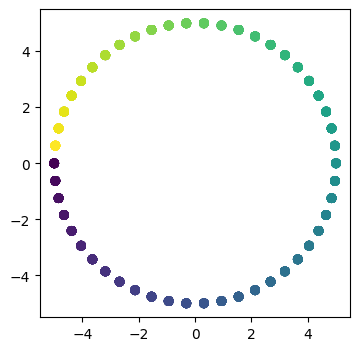

In [4]:
colors = ss.repeat(n, 1).T.reshape(-1)
mplot = means.reshape(-1, 2)
figsize(4,4)
plt.scatter(mplot[:, 0], mplot[:, 1], c=colors)

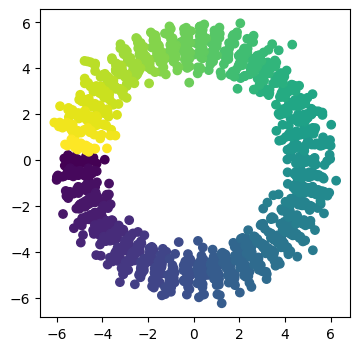

In [5]:
colors = ss.repeat(n, 1).T.reshape(-1)
splot = samples.reshape(-1, 2)
plt.scatter(splot[:, 0], splot[:, 1], c=colors)

Ok, now we have data whose statistics change pretty obviously with input stimulus. 

In [6]:
data = samples.reshape(-1, 2)

#### Numerical point: the CGF calculation is numerically unstable

This happens because the we are taking the logarithm of the average of exponentials. If the exponentials blow up to be larger than the size of a float, then this will blow up if done naively.

Luckily, `torch.logsumexp` does exactly the calculation that we want.


In [7]:
def make_CGF(ts, data):
    """ compute empirical CGF """
    outs = torch.exp(data @ ts.T).mean(axis=0)
    return torch.log(outs)

In [8]:
torch.exp(torch.tensor([80, 85, 90, 95]))

tensor([5.5406e+34, 8.2230e+36,        inf,        inf])

In [9]:
dev = 80*torch.ones(100,2)
naive = torch.log(torch.exp(dev).mean(axis=0))
stable = torch.logsumexp(dev, 0) - torch.log(torch.tensor(dev.shape[0]))
print(f'naive: {naive}')
print(f'stable: {stable}')

naive: tensor([80., 80.])
stable: tensor([80., 80.])


In [10]:
dev = 85*torch.ones(100,2)
naive = torch.log(torch.exp(dev).mean(axis=0))
stable = torch.logsumexp(dev, 0) - torch.log(torch.tensor(dev.shape[0]))
print(f'naive: {naive}')
print(f'stable: {stable}')

naive: tensor([inf, inf])
stable: tensor([85., 85.])


In [11]:
def make_CGF_stable(ts, data):
    """ compute empirical CGF """
    num_points = torch.tensor(data.shape[0])
    
    outs = torch.logsumexp(data @ ts.T, 0) - torch.log(num_points)
    return outs

In [12]:
ts = 5*torch.rand(1000, 2)

print('unstable infinite:', make_CGF(ts, data).isinf().any())
print('max difference:', (make_CGF(ts, data) - make_CGF_stable(ts, data)).abs().max())

unstable infinite: tensor(False)
max difference: tensor(3.8147e-06)


Close enough

In [13]:
ts = 12*torch.rand(1000, 2)

print('unstable infinite:', make_CGF(ts, data).isinf().any())
print('stable infinite:', make_CGF_stable(ts, data).isinf().any())
finite = torch.logical_not(make_CGF(ts, data).isinf())
print('max difference (on finite):', (make_CGF(ts, data)[finite] - make_CGF_stable(ts, data)[finite]).abs().max())

unstable infinite: tensor(True)
stable infinite: tensor(False)
max difference (on finite): tensor(7.6294e-06)


Looks good.

#### Continuing

### Step 1: getting the network to actually fit the CGF of the data

In [7]:
from icnn import CGF_ICNN
from models.trainers import trainModel

In [8]:
%run icnn.py

<Figure size 400x400 with 0 Axes>

In [9]:
CGF = CGF_ICNN(data)

In [10]:
ckpt = trainModel(CGF, log_wandb=False, directory='trainedParameters/test0',
                 )

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/luke/Documents/activeProjects/learnedExpFam/trainedParameters/test0 exists and is not empty.

  | Name           | Type       | Params | Mode 
-----------------------------------------------

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
model = CGF_ICNN.load_from_checkpoint(ckpt, data_to_model=data)

#### One major question: how to read-out features of this model?

Sub question: what does tilting mean for such a model?

In [23]:
model.jac(torch.tensor([[0.5,0.80]]))

tensor([[3.4896, 4.4809]], device='mps:0', grad_fn=<SliceBackward0>)

In [24]:
model.hess(torch.tensor([[0.5,0.80]]))

tensor([[[0.8098, 0.3820],
         [0.3820, 0.7903]]], device='mps:0', grad_fn=<SliceBackward0>)